In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [7]:
#loading the csv data to a Pandas DataFrame
gold_data=pd.read_csv('gld_price_data.csv')

In [9]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [12]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [14]:
# number rows and columns
gold_data.shape

(2290, 6)

In [15]:
#getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [17]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [18]:
#getting the statisticaln measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [19]:
correlation=gold_data.corr()

<AxesSubplot:>

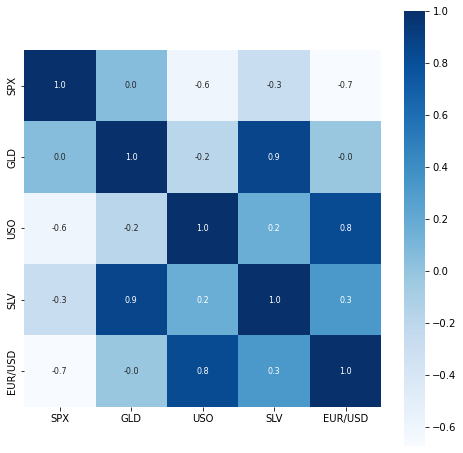

In [24]:
#heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="Blues")

In [25]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\sameer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

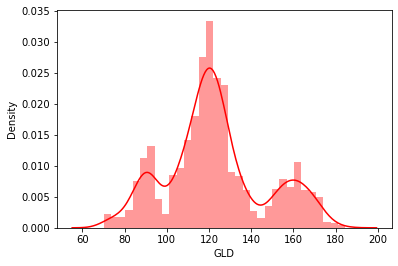

In [28]:
#checking the distributuion of the gld price
sns.distplot(gold_data['GLD'],color='red')

Splitting the Features and Target

In [29]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [30]:
print(X)
print('----------------------------')
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
----------------------------
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training :Random Forest Regressor

In [43]:
regressor=RandomForestRegressor(n_estimators=100)
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [44]:
#training the 
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [48]:
#model Evaluation 
test_data_prediction=regressor.predict(X_test)
print(test_data_prediction)

[168.75449998  82.28239991 116.1318999  127.7740006  120.56280116
 154.61989791 150.28389844 125.94690009 117.5240987  125.94890087
 116.55790114 171.40740096 141.16359866 167.56179794 115.10869986
 117.59950063 139.03170303 170.24050071 159.41910203 158.06159975
 155.20310021 125.65420002 174.80409999 157.53790378 125.16710029
  94.06479991  77.42650036 120.56120026 119.1253996  167.35259961
  88.32100076 125.27200037  91.12490091 117.82889996 121.12049904
 135.83750039 115.5089008  115.01760083 147.07969967 107.27750108
 104.36340252  87.33589822 126.62160004 117.80789953 153.84249942
 119.61089983 108.49049975 108.12159813  93.18370042 126.93249823
  75.41179993 113.7310991  121.40670053 111.37289923 118.88569905
 120.95739925 158.87589932 168.81450072 147.08259703  85.88239855
  94.28920029  86.8979989   90.5186999  118.81990084 126.38760059
 127.47959993 170.08060023 122.31129953 117.38189901  98.78630027
 167.9855004  143.1796984  132.44150245 121.20050241 121.43119974
 119.56720

In [49]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9892564042220432


Compare the Actual Values and Predicted Values in a Plot



In [51]:
Y_test = list(Y_test)

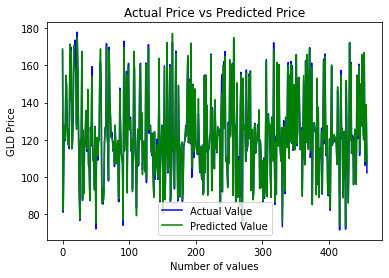

In [52]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()